In [ ]:
%cd ../

## gender-add-residual-true-add-ic-true, seed 1, cross val test 3

In [ ]:
import json
import os
def read_json(path):
    with open(path, 'r') as stream:
        loaded = json.load(stream)
    return loaded
url_face = 'http://127.0.0.1:10002/'

In [ ]:
import numpy as np

data = np.load("./data/Adience/data-aligned.npy", allow_pickle=True).item()
data = data[3]

from model.model import ResMLP
import torch
from utils import read_json, forward_mc, enable_dropout

device = 'cpu'

config_path = './training-results/gender-add-residual-true-add-ic-true/cross-val/pre-trained/models/ResMLP/0806_115018/config.json'
config = read_json(config_path)

model = ResMLP(**config['arch']['args'])
checkpoint = config_path.replace('config.json', 'model_best.pth')
checkpoint = torch.load(checkpoint, map_location=torch.device(device))
state_dict = checkpoint['state_dict']
model.load_state_dict(state_dict)
model.to(device)
model.eval()
enable_dropout(model)

In [ ]:
from tqdm.notebook import tqdm
from glob import glob
import jsonpickle
from PIL import Image
import pickle
import requests

MAXIMUM_ENTROPY = {'gender': 0.6931471805599453,
                   'age': 4.615120516841261}

for idx, sample in tqdm(enumerate(data)):
    embedding = sample['embedding']
    embedding = embedding.reshape(-1, 512).astype(np.float32)
    gender_mean, gender_entropy = forward_mc(model, embedding)
    

    data[idx]['m'] = 1 - gender_mean
    data[idx]['f'] = gender_mean
    data[idx]['entropy'] = gender_entropy
    
data = sorted(data, key=lambda k: k['entropy']) 

In [ ]:
from insightface.app.face_analysis import FaceAnalysis as FaceDetectionRecognition

fdr = FaceDetectionRecognition(det_name='retinaface_r50_v1',
                               rec_name='arcface_r100_v1',
                               ga_name=None)
fdr.prepare(-1)

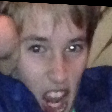

0.3533210654253197 0.11328125


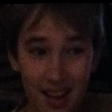

0.3533210654253197 0.11328125


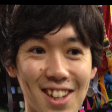

0.3573210273163596 0.884765625


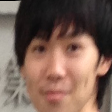

0.3612835722709638 0.1171875


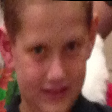

0.3652092425584923 0.880859375


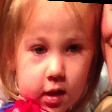

0.36909856231146065 0.87890625


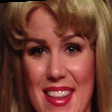

0.37295203840095553 0.123046875


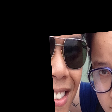

0.37295203840095553 0.876953125


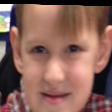

0.37677016125643675 0.125


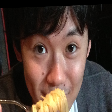

0.37677016125643675 0.125


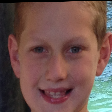

0.38430223133893615 0.87109375


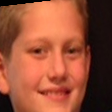

0.38430223133893615 0.12890625


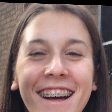

0.3880170839005007 0.130859375


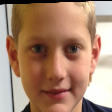

0.39169839521161126 0.8671875


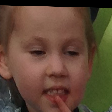

0.39169839521161126 0.1328125


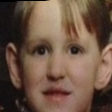

0.3989620570281841 0.13671875


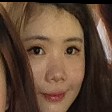

0.3989620570281841 0.86328125


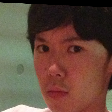

0.4025452083559287 0.861328125


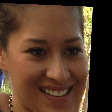

0.4096160673367094 0.857421875


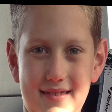

0.4096160673367094 0.857421875


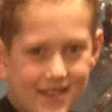

0.41310450855124226 0.85546875


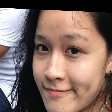

0.41310450855124226 0.14453125


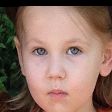

0.4165620961879527 0.853515625


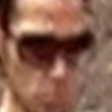

0.4165620961879527 0.146484375


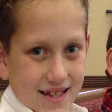

0.41998917198884345 0.1484375


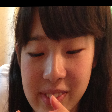

0.426753108864969 0.84765625


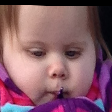

0.43009060830127965 0.154296875


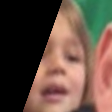

0.4333988732907457 0.84375


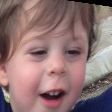

0.4333988732907457 0.15625


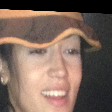

0.4366782024551663 0.841796875


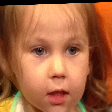

0.43992888673610886 0.83984375


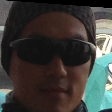

0.4431512096738107 0.162109375


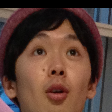

0.44951187025376643 0.833984375


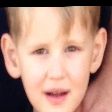

0.45576231426641023 0.169921875


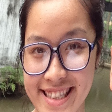

0.45576231426641023 0.830078125


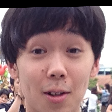

0.45884684243710105 0.171875


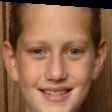

0.47679933533495994 0.18359375


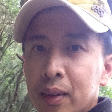

0.4882556288024058 0.19140625


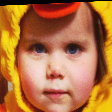

0.4910575917265567 0.193359375


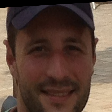

0.4938350966590116 0.1953125


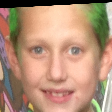

0.49658832941661785 0.197265625


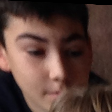

0.49658832941661785 0.197265625


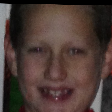

0.5047041940481001 0.203125


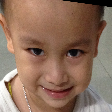

0.5073621187081091 0.205078125


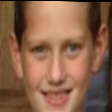

0.5151961421767727 0.2109375


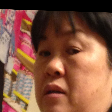

0.5151961421767727 0.7890625


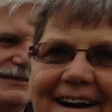

0.5151961421767727 0.7890625


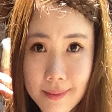

0.5228238736809075 0.783203125


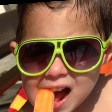

0.5253213195155949 0.21875


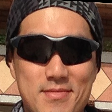

0.5253213195155949 0.78125


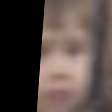

0.527796443684918 0.220703125


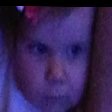

0.5326802926282024 0.775390625


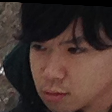

0.5350892933498348 0.7734375


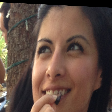

0.5374765244393503 0.228515625


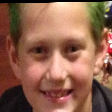

0.539842117324011 0.23046875


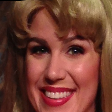

0.5468103438452038 0.763671875


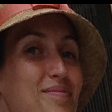

0.553588324436276 0.2421875


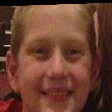

0.5644707167995798 0.748046875


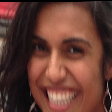

0.5768626509045702 0.736328125


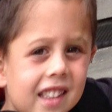

0.5827920531943336 0.26953125


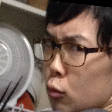

0.5922880160978646 0.720703125


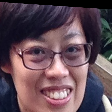

0.601310124381573 0.7109375


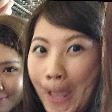

0.603058553898855 0.291015625


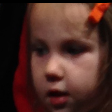

0.6081931982998787 0.296875


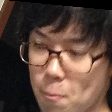

0.613163360942214 0.697265625


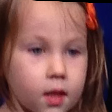

0.6147838490351121 0.6953125


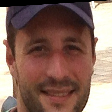

0.6163863306968185 0.306640625


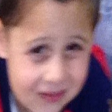

0.6195375308003075 0.310546875


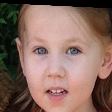

0.6210863745552451 0.6875


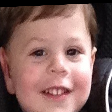

0.6256266102345286 0.318359375


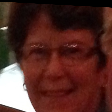

0.6285654417677188 0.322265625


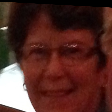

0.6342339488677953 0.330078125


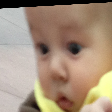

0.6409317837571086 0.66015625


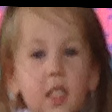

0.6422201465915374 0.658203125


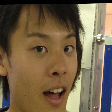

0.6422201465915374 0.341796875


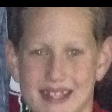

0.6495958263892689 0.353515625


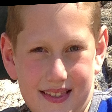

0.6541785244088595 0.638671875


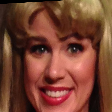

0.6595352278211644 0.37109375


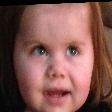

0.6595352278211644 0.62890625


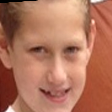

0.6615632381579821 0.625


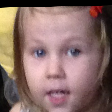

0.6635261434332931 0.62109375


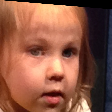

0.6644832651976551 0.619140625


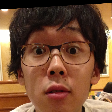

0.6802667709929271 0.419921875


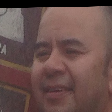

0.6814975628548856 0.423828125


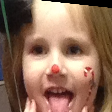

0.683771836402149 0.431640625


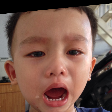

0.6883712007947482 0.451171875


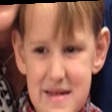

0.6891057836157397 0.455078125


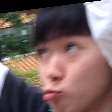

0.689778833950113 0.541015625


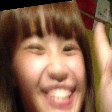

0.689778833950113 0.458984375


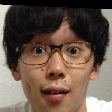

0.6903904349861226 0.537109375


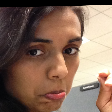

0.6911927820032008 0.53125


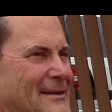

0.6914295831847288 0.470703125


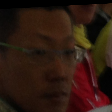

0.6916510729702123 0.52734375


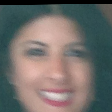

0.6918572581554296 0.525390625


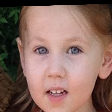

0.6923840469627632 0.51953125


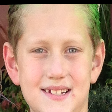

0.692872497205584 0.48828125


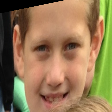

0.6930251052799065 0.5078125


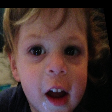

0.6930785144374709 0.505859375


In [47]:
for idx, sample in enumerate(data[-100:]):
    try:
        image = Image.open(sample['image_path'])
        list_of_features, _img = fdr.get(np.array(image))
        image = Image.fromarray(_img)
        display(image)
        print(sample['entropy'], sample['f'])
        image.save(f"./notebooks/entropy-images/high/{idx}-{sample['entropy']}.jpg")
    except:
        pass

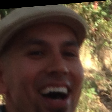

0.0 0.0


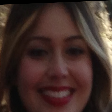

0.0 1.0


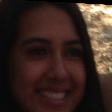

0.0 1.0


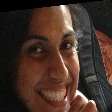

0.0 1.0


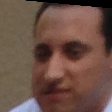

0.0 0.0


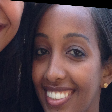

0.0 1.0


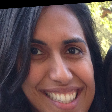

0.0 1.0


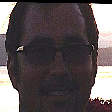

0.0 0.0


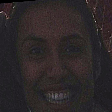

0.0 1.0


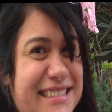

0.0 1.0


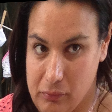

0.0 1.0


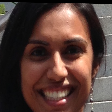

0.0 1.0


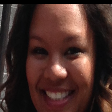

0.0 1.0


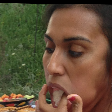

0.0 1.0


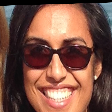

0.0 1.0


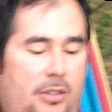

0.0 0.0


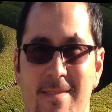

0.0 0.0


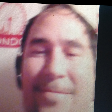

0.0 0.0


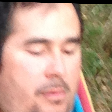

0.0 0.0


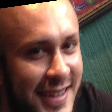

0.0 0.0


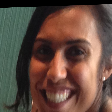

0.0 1.0


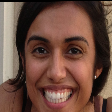

0.0 1.0


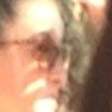

0.0 1.0


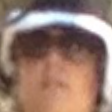

0.0 1.0


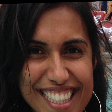

0.0 1.0


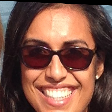

0.0 1.0


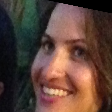

0.0 1.0


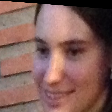

0.0 1.0


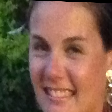

0.0 1.0


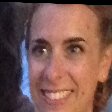

0.0 1.0


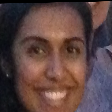

0.0 1.0


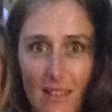

0.0 1.0


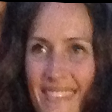

0.0 1.0


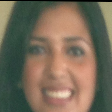

0.0 1.0


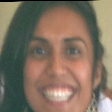

0.0 1.0


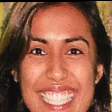

0.0 1.0


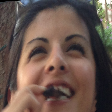

0.0 1.0


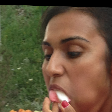

0.0 1.0


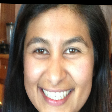

0.0 1.0


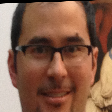

0.0 0.0


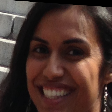

0.0 1.0


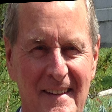

0.0 0.0


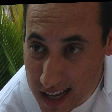

0.0 0.0


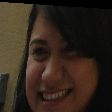

0.0 1.0


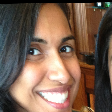

0.0 1.0


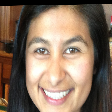

0.0 1.0


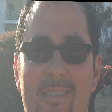

0.0 0.0


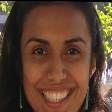

0.0 1.0


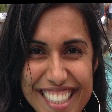

0.0 1.0


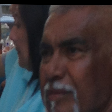

0.0 0.0


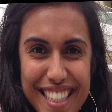

0.0 1.0


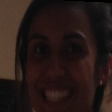

0.0 1.0


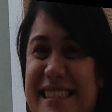

0.0 1.0


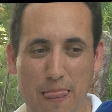

0.0 0.0


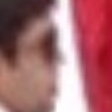

0.0 1.0


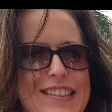

0.0 1.0


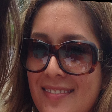

0.0 0.0


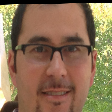

0.0 0.0


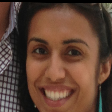

0.0 1.0


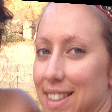

0.0 1.0


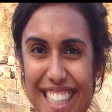

0.0 1.0


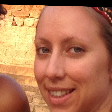

0.0 1.0


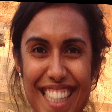

0.0 1.0


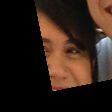

0.0 0.0


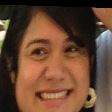

0.0 1.0


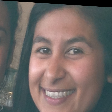

0.0 1.0


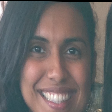

0.0 1.0


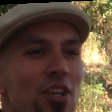

0.0 0.0


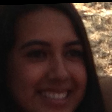

0.0 1.0


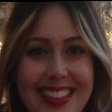

0.0 1.0


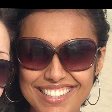

0.0 1.0


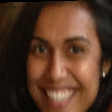

0.0 1.0


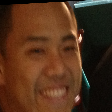

0.0 0.0


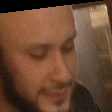

0.0 0.0


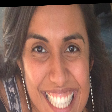

0.0 1.0


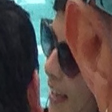

0.0 1.0


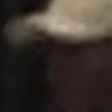

0.0 1.0


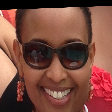

0.0 1.0


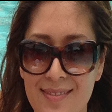

0.0 0.0


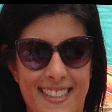

0.0 1.0


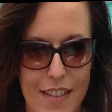

0.0 1.0


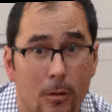

0.0 0.0


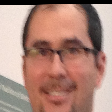

0.0 0.0


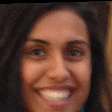

0.0 1.0


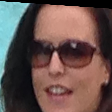

0.0 1.0


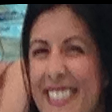

0.0 1.0


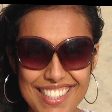

0.0 1.0


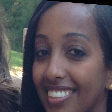

0.0 1.0


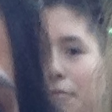

0.0 1.0


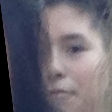

0.0 1.0


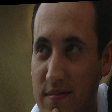

0.0 0.0


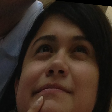

0.0 1.0


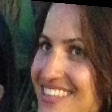

0.0 1.0


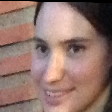

0.0 1.0


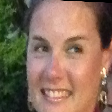

0.0 1.0


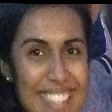

0.0 1.0


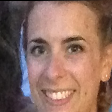

0.0 1.0


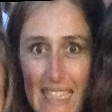

0.0 1.0


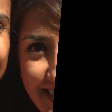

0.0 1.0


In [48]:
for idx, sample in enumerate(data[:100]):
    try:
        image = Image.open(sample['image_path'])
        list_of_features, _img = fdr.get(np.array(image))
        image = Image.fromarray(_img)
        display(image)
        print(sample['entropy'], sample['f'])
        image.save(f"./notebooks/entropy-images/low/{idx}-{sample['entropy']}.jpg")
    except:
        pass